A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

O objetivo deste treinamento será estimar um modelo de Machine Learning utilizando a técnica de Regressão Linear para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

Fonte de dados: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo


Descrição das colunas:

*  **Data** - Data
*  **Temperatura_Media** - Temperatura Média (°C)
*  **Temperatura_Minima** - Temperatura Mínima (°C)
*  **Temperatura_Maxima** - Temperatura Máxima (°C)
*  **Precipitacao** - Precipitação (mm)
*  **Final_de_Semana** - Final de Semana (1 = Sim; 0 = Não)
*  **Consumo** - Consumo de Cerveja (litros


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import probplot
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import warnings

warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
types = {'Consumo de cerveja (litros)': 'object'}
dados = pd.read_csv('Consumo_cerveja.csv', dtype={'Consumo de cerveja (litros)': 'object'})

In [ ]:
dados.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


### Renomeando as colunas

In [ ]:
dados.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [ ]:
renomear = {'Temperatura Media (C)': 'Temperatura_Media',
            'Temperatura Minima (C)': 'Temperatura_Minima',
           'Temperatura Maxima (C)': 'Temperatura_Maxima',
           'Precipitacao (mm)': 'Precipitacao',
           'Final de Semana': 'Final_de_Semana',
           'Consumo de cerveja (litros)': 'Consumo'}

dados.rename(mapper=renomear, axis=1, inplace=True)

In [ ]:
copia = dados.copy()

### Valores nulos

In [ ]:
dados.isnull().sum() / dados.shape[0] * 100

Data                  61.211477
Temperatura_Media     61.211477
Temperatura_Minima    61.211477
Temperatura_Maxima    61.211477
Precipitacao          61.211477
Final_de_Semana       61.211477
Consumo               61.211477
dtype: float64

In [ ]:
dados.dropna(inplace=True)

In [ ]:
dados.index = range(dados.shape[0])

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                365 non-null    object 
 1   Temperatura_Media   365 non-null    object 
 2   Temperatura_Minima  365 non-null    object 
 3   Temperatura_Maxima  365 non-null    object 
 4   Precipitacao        365 non-null    object 
 5   Final_de_Semana     365 non-null    float64
 6   Consumo             365 non-null    object 
dtypes: float64(1), object(6)
memory usage: 20.1+ KB


### Trocando a virgula por ponto nas colunas de temperatura e precipitação

In [ ]:
for i in dados.columns[1:5]:
  dados[i] = dados[i].str.replace(",", ".")
dados.Consumo = dados.Consumo.str.replace(".", "")

### Removendo o separador de milhares da coluna consumo

In [ ]:
dados.Consumo = dados.Consumo.str.replace(".", "")

### fazendo casting

In [ ]:
for i in dados.columns:
    if i == 'Data':
        dados[i] = pd.to_datetime(dados[i])
    else:
        dados[i] = dados[i].astype(float)

In [ ]:
dados.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                365 non-null    datetime64[ns]
 1   Temperatura_Media   365 non-null    float64       
 2   Temperatura_Minima  365 non-null    float64       
 3   Temperatura_Maxima  365 non-null    float64       
 4   Precipitacao        365 non-null    float64       
 5   Final_de_Semana     365 non-null    float64       
 6   Consumo             365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.1 KB


### Criando duas Variaveis para armazenar o dia e o mês

In [ ]:
dados['Mes'] = dados['Data'].apply(lambda d: d.strftime('%B'))
dados['Dia'] = dados['Data'].apply(lambda d: d.strftime('%A'))

meses = {
     'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April' : 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July' : 'Julho',
    'August' : 'Agosto',
    'September' : 'Setembro',
    'October' : 'Outubro',
    'November' : 'Novembro',
    'December' : 'Dezembro'
}

dias = {
     'Sunday' : 'Domingo', 
    'Monday' : 'Segunda-feira', 
    'Tuesday' : 'Terça-feira', 
    'Wednesday' : 'Quarta-feira', 
    'Thursday' : 'Quinta-feira', 
    'Friday' : 'Sexta-feira',
    'Saturday' : 'Sábado'
}

dados['Mes'] = dados['Mes'].map(meses)
dados['Dia'] = dados['Dia'].map(dias)

## Análise Exploratória dos Dados

### Estatísticas Descritivas

In [ ]:
quantiles = dados.Consumo.quantile([x/10 for x in range(10)]).values
pd.DataFrame(quantiles, index=[f'{x}%' for x in range(0, 100, 10)], columns=['Valores'])

,Valores
0%,14343.0
10%,20298.8
20%,21511.8
30%,22612.0
40%,23974.8
50%,24867.0
60%,26244.2
70%,27721.8
80%,29571.0
90%,31618.2


### Matriz de correlação

In [ ]:
dados.corr()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
Temperatura_Media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura_Minima,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura_Maxima,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final_de_Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


### Análises Gráficas

In [ ]:
sns.set_style('darkgrid')

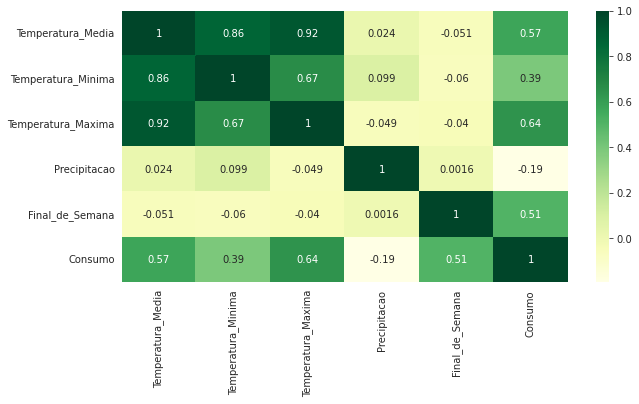

In [ ]:
ax = sns.heatmap(data=dados.corr(), annot=True, cmap='YlGn')
ax.figure.set_size_inches(10,5)

#### Em regressão multipla, as variáveis preditoras costumam ser correlacionadas umas às outras. Ter preditoras correlacionadas pode tornar difícil interpretar o sinal e o valor dos coeficientes de regressão. Casos extremos de variáveis correlacionadas produz multicolinearidade - uma condição em que há redundância entre as variáveis preditoras.
#### BRUCE Peter; BRUCE Andrew. Estatística Prática para Cientistas de Dados 1° ed. Alta Book
#### Tendo isso em mente optei por primeiro estimar o modelo sem as variaveis 'Temperatura Minima' e 'Temperatura Média'

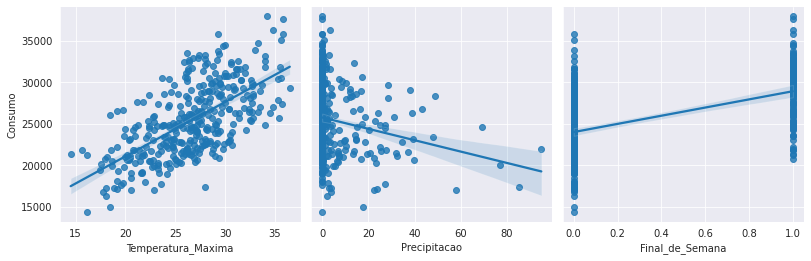

In [ ]:
ax = sns.pairplot(y_vars='Consumo', x_vars=['Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana'],
                  kind='reg', data=dados)
ax.figure.set_size_inches(12,4)

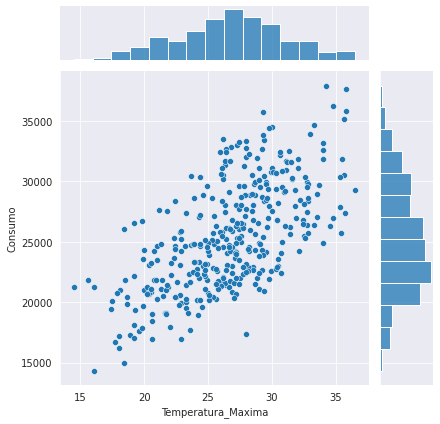

In [ ]:
sns.jointplot(x='Temperatura_Maxima', y='Consumo', data=dados)

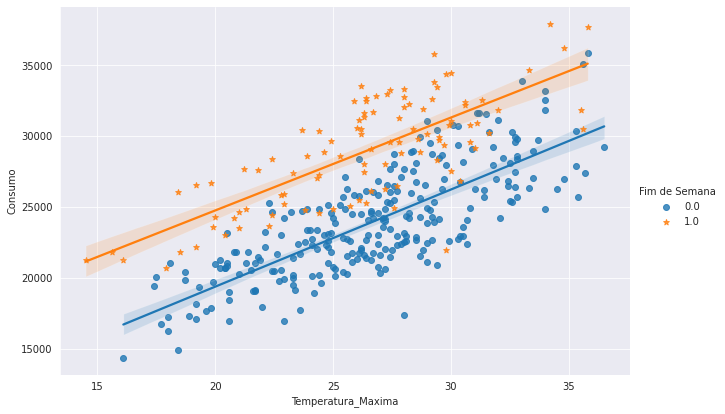

In [ ]:
ax = sns.lmplot(x='Temperatura_Maxima', y='Consumo', hue='Final_de_Semana',
                markers= ['o', '*'], legend=False, data=dados)
ax.figure.set_size_inches(10,6)
ax.add_legend(title='Fim de Semana')

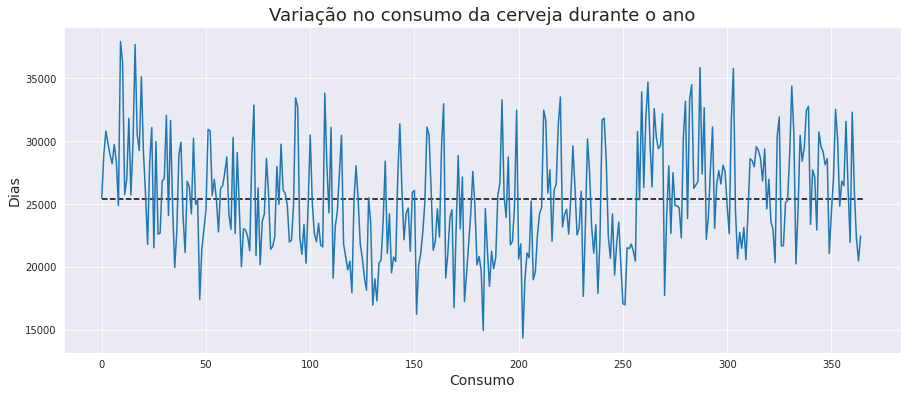

In [ ]:
ax = sns.lineplot(y='Consumo',x=dados.index, data=dados)
ax.figure.set_size_inches(15,6)
ax.hlines(y=dados.Consumo.mean(), xmin=0, xmax=365, colors='black', linestyles='dashed')
ax.set_title('Variação no consumo da cerveja durante o ano', fontsize=18)
ax.set_ylabel('Dias', fontsize=14)
ax.set_xlabel('Consumo', fontsize=14)
ax

Text(0, 0.5, 'Consumo')

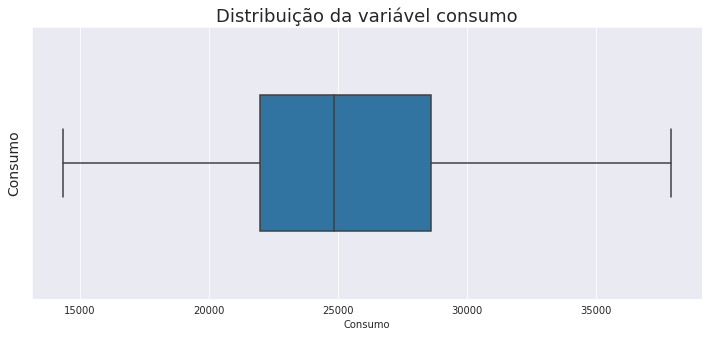

In [ ]:
ax = sns.boxplot(x='Consumo', data=dados, width=0.5)
ax.figure.set_size_inches(12,5)
ax.set_title('Distribuição da variável consumo', fontsize=18)
ax.set_ylabel('Consumo', fontsize=14)

#### Valor total de cerveja consumida em todos os dias da semana e em todos os dias do  final de semana ao longo do ano

In [ ]:
d_de_semana = sum(dados.query("Final_de_Semana == 0.0")['Consumo'])
fds = sum(dados.query("Final_de_Semana == 1.0")['Consumo'])
print(f'consumo nos dia da semana: {d_de_semana}\nconsumo nos finais de semana: {fds} ')

consumo nos dia da semana: 6263536.0
consumo nos finais de semana: 3007963.0 


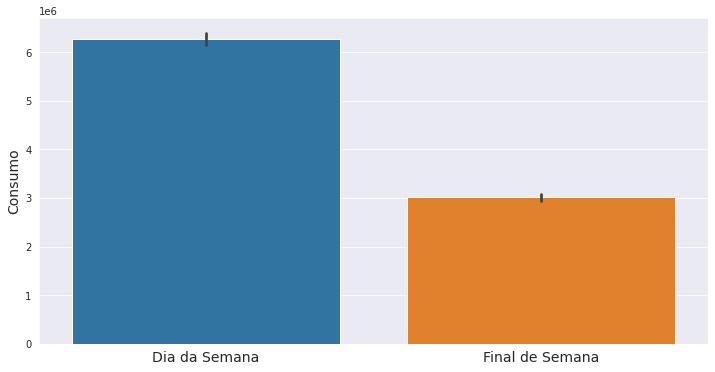

In [ ]:
ax = sns.barplot(x='Final_de_Semana', y='Consumo', data=dados, estimator=sum)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('')
ax.set_ylabel('Consumo', fontsize=14)
ax.set_xticklabels(['Dia da Semana', 'Final de Semana'], fontdict={'fontsize': 14})
ax

#### Valor total de cerveja consumida em todos os dias da semana ao longo do ano

In [ ]:
consumo_dia_semana = dados[['Dia', 'Consumo']].groupby(by='Dia').sum()
consumo_dia_semana

,Consumo
Dia,
Domingo,1508391.0
Quarta-feira,1238140.0
Quinta-feira,1276057.0
Segunda-feira,1227701.0
Sexta-feira,1255170.0
Sábado,1499572.0
Terça-feira,1266468.0


In [ ]:
ordem = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira',
         'Sexta-feira', 'Sábado', 'Domingo']

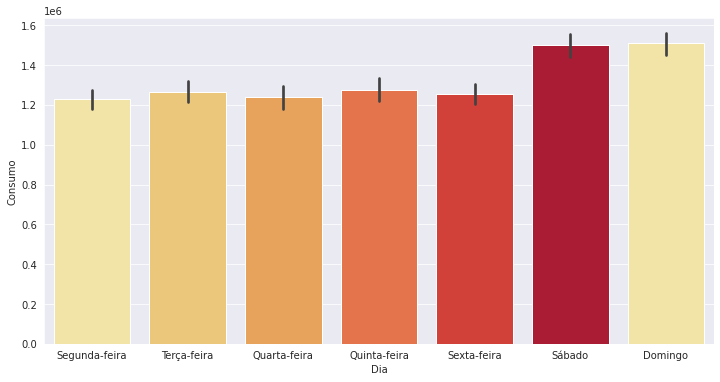

In [ ]:
palette = sns.color_palette('YlOrRd')
ax = sns.barplot(x='Dia', y='Consumo', data=dados, estimator=sum, order=ordem, palette=palette)
ax.figure.set_size_inches(12,6)

### Valor total de cerveja consumida durante os meses

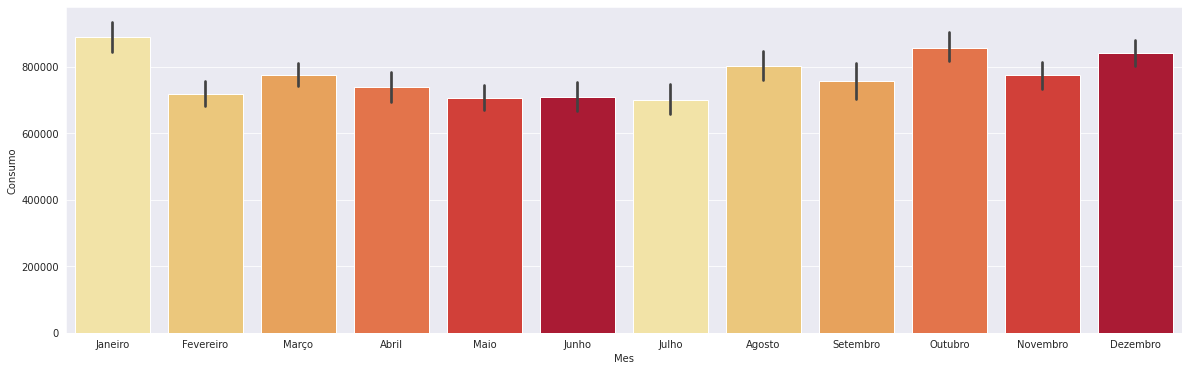

In [ ]:
palette = sns.color_palette('YlOrRd')
ax = sns.barplot(x='Mes', y='Consumo', data=dados, estimator=sum, palette=palette)
ax.figure.set_size_inches(20,6)

#### Variação do consumo de cerveja nos dias da semana

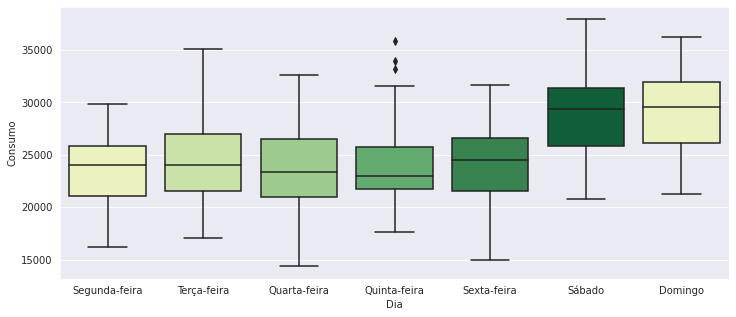

In [ ]:
palette = sns.color_palette('YlGn')
ax = sns.boxplot(y='Consumo', x='Dia', data=dados, order=ordem, palette=palette)
ax.figure.set_size_inches(12,5)

#### Variação no consumo de cerveja durante os meses

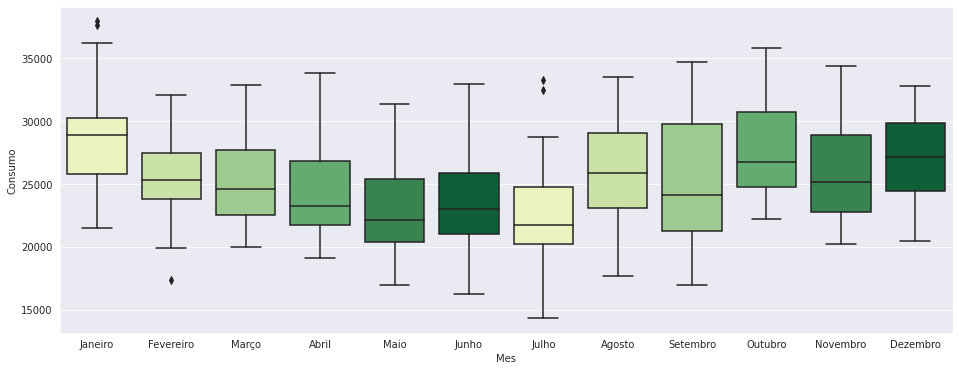

In [ ]:
ax = sns.boxplot(y='Consumo', x='Mes', data=dados, palette=palette)
ax.figure.set_size_inches(16,6)

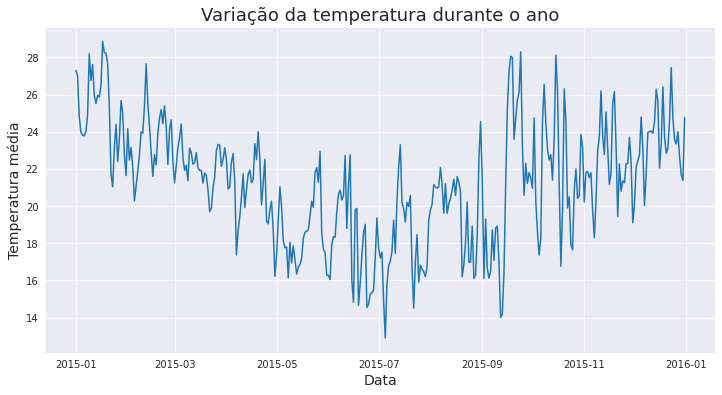

In [ ]:
ax = sns.lineplot(x='Data', y='Temperatura_Media', data=dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Variação da temperatura durante o ano', fontsize=18)
ax.set_ylabel('Temperatura média', fontsize=14)
ax.set_xlabel('Data', fontsize=14)
ax

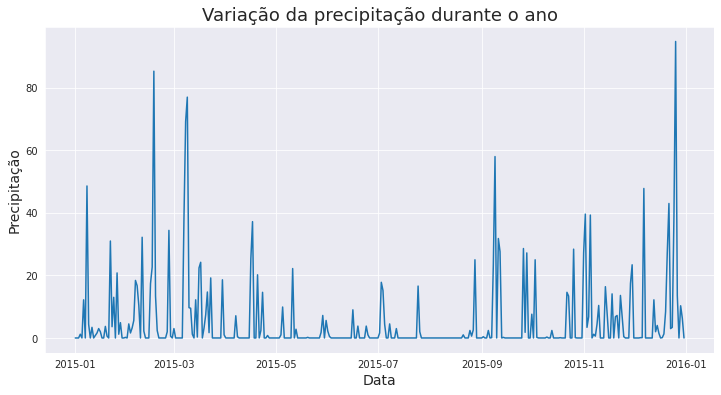

In [ ]:
ax = sns.lineplot(x='Data', y='Precipitacao', data=dados)
ax.figure.set_size_inches(12,6)
ax.set_title('Variação da precipitação durante o ano', fontsize=18)
ax.set_ylabel('Precipitação', fontsize=14)
ax.set_xlabel('Data', fontsize=14)
ax

### Estimando um modelo de regressão linear múltipla para o consumo

Na regressão linear múltipla o relacionamento entre cada coeficiente e sua variável é linear

In [ ]:
def regressao(y, x):
  """Regressão Linear"""
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)
  modelo = LinearRegression()
  modelo.fit(x_train, y_train)
  y_previsto = modelo.predict(x_test)
  r2 = metrics.r2_score(y_test, y_previsto)
  return r2, modelo.coef_, modelo.intercept_

In [ ]:
y = dados['Consumo']

modelo com Temperatura maxima, precipitação e final de semana

In [ ]:
x = dados[['Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana']]
r, _, _ = regressao(y, x)
print(f'R²: {r.round(3)}')

R²: 0.726


O coeficiente de determinação, também chamado de R², varia de 0 a 1 e mede a proporção de variação nos dados que é contabilizada no modelo.

### Estimando um modelo com outras variáveis de Temperatura

In [ ]:
temperaturas = ['Temperatura_Media', 'Temperatura_Minima']
for t in temperaturas:
  x = dados[[t, 'Precipitacao', 'Final_de_Semana']]
  r, _, _= regressao(y, x)
  print(f'Modelo com a variável: {x.columns[0]}')
  print(f'R²: {r.round(3)}\n')

Modelo com a variável: Temperatura_Media
R²: 0.643

Modelo com a variável: Temperatura_Minima
R²: 0.485



Os testes mostram que o modelo com o melhor resultado é o da Temperatura Máxima

### Gerando previsões pontuais

In [ ]:
x = dados[['Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)
modelo = LinearRegression()
modelo.fit(x_train, y_train)

temp_max = 38.5
chuva = 1.0
fds = 1
entrada = [[temp_max, chuva, fds]]

y_previsto = modelo.predict(entrada)

print(f'Resultado: {y_previsto[0].round(3)}')

Resultado: 37016.729


## Coeficientes estimados

In [ ]:
x = dados[['Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana']]
_, coef, intercept = regressao(y, x)


In [ ]:
index = ['intercepto','Coef_Temp_maxima', 'Coef_Precipitação', 'Coef_FDS']
pd.DataFrame(
    data=np.append(intercept.round(3), coef.round(3)), index=index, columns=['parâmetros'])

,parâmetros
intercepto,6983.947
Coef_Temp_maxima,654.402
Coef_Precipitação,-62.696
Coef_FDS,4901.005
